In [744]:
# import packages for analysis and modeling
import pandas as pd #data frame operations
import numpy as np #arrays and math functions
#from scipy.stats import uniform #for training and test splits
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
import matplotlib.pyplot as plt # 2D Plotting
%matplotlib inline
import seaborn as sns #Seaborn library for plotting
from scipy.stats import uniform  # for training-and-test split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Coaches Data

In [745]:
#load data Coaches 9 frame: https://github.com/2SUBDA/IST_718
coachdf=pd.read_csv("./Coaches9.csv")
#Sort dataframe by conferences in ascending order
coachdf.sort_values("Conference",inplace=True, ascending=True)
#Summary statistics to provide a quick overview of central tendencies, shape, etc. 
coachdf.describe()
#look for null values 
cnull=coachdf.isnull().sum()
print("Number of Null Values:", cnull.sum())
print("Number of Rows:", len(coachdf))
#Change School column to name to "Team"
coachdf = coachdf.rename(columns={'School': 'Team'})
coachdf

Number of Null Values: 0
Number of Rows: 129


,Team,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout
41,Houston,AAC,Major Applewhite,"$1,750,000","$1,750,000","$782,500","$20,000",$0,"$2,112,500"
27,Connecticut,AAC,Randy Edsall,"$1,100,000","$1,100,000","$650,000","$129,000",$0,"$1,000,000"
69,Navy,AAC,Ken Niumatalolo,"$2,163,000","$2,163,000",--,--,$0,--
22,Cincinnati,AAC,Luke Fickell,"$2,000,000","$2,000,000","$625,000",$0,$0,"$7,100,000"
99,Southern Methodist,AAC,Sonny Dykes,--,--,--,--,$0,--
...,...,...,...,...,...,...,...,...,...
95,South Alabama,Sun Belt,Steve Campbell,"$600,000","$600,000","$295,000",--,$0,"$918,333"
52,Louisiana-Lafayette,Sun Belt,Billy Napier,"$850,000","$850,000","$435,000",--,$0,"$2,671,875"
53,Louisiana-Monroe,Sun Belt,Matt Viator,"$390,000","$390,000","$50,000",$0,$0,"$175,000"
4,Appalachian State,Sun Belt,Scott Satterfield,"$712,500","$712,500","$295,000","$145,000",$0,"$2,160,417"


## Stadium Data

In [746]:
#load data stadiums-geocoded frame: https://github.com/gboeing/data-visualization/blob/main/ncaa-football-stadiums/data/stadiums-geocoded.csv
stadiumdf=pd.read_csv("./stadiums-geocoded.csv")
#Sort dataframe by conferences in ascending order
stadiumdf.sort_values("conference",inplace=True, ascending=True)
#Summary statistics to provide a quick overview of central tendencies, shape, etc. 
stadiumdf.describe()
#look for null values 
snull=stadiumdf.isnull().sum()
print("Number of Null Values:", snull.sum())
print("Number of Rows:", len(stadiumdf))
#Capitalize the first letter in each column to match coaches data frame
stadiumdf.columns=stadiumdf.columns.str.capitalize()
stadiumdf

Number of Null Values: 107
Number of Rows: 253


,Stadium,City,State,Team,Conference,Capacity,Built,Expanded,Div,Latitude,Longitude
38,Nippert Stadium,Cincinnati,OH,Cincinnati,AAC,40000,1924,2015,fbs,39.131284,-84.516261
39,Memorial Stadium,Clemson,SC,Clemson,AAC,81500,1942,2006,fbs,34.678747,-82.843180
41,Andy Kerr Stadium,Hamilton,New York,Colgate Raiders,AAC,10221,1966,1991,fcs,42.816527,-75.545812
42,Folsom Field,Boulder,CO,Colorado,AAC,50183,1924,2003,fbs,40.009398,-105.266887
43,Sonny Lubick Field at Hughes Stadium,Fort Collins,CO,Colorado State,AAC,34400,1968,2006,fbs,40.561742,-105.139844
...,...,...,...,...,...,...,...,...,...,...,...
187,Ladd Peebles Stadium,Mobile,AL,South Alabama,Sun Belt,33500,1948,2009,fbs,30.674239,-88.075633
217,Veterans Memorial Stadium,Troy,AL,Troy,Sun Belt,30000,1950,2003,fbs,31.799527,-85.952177
74,Georgia Dome,Atlanta,GA,Georgia State,Sun Belt,28155,1992,NaN,fbs,33.757617,-84.401060
40,Brooks Stadium,Conway,South Carolina,Coastal Carolina,Sun Belt,9214,2003,20062010,fcs,33.792838,-79.017023


## Graduation Rate Data 

In [747]:
#load data stadiums-geocoded frame: https://web3.ncaa.org/aprsearch/gsrsearch
grdf=pd.read_csv("./gradrate_U.csv")
#Sort dataframe by conferences in ascending order
grdf.sort_values("Conference",inplace=True, ascending=True)
#Summary statistics to provide a quick overview of central tendencies, shape, etc. 
grdf.describe()
#look for null values 
grnull=grdf.isnull().sum()
print("Number of Null Values:", grnull.sum())
print("Number of Rows:", len(grdf))
##Capitalize the first letter in each column to match coaches data frame
##grdf.columns=grdf.columns.str.capitalize()
grdf = grdf.rename(columns={'School': 'Team'})
grdf

Number of Null Values: 20
Number of Rows: 257


,Cohort Year,Team,Conference,Sport,State,GSR,FGR
0,2015,Central Florida,AAC,Football,FL,85,65.0
9,2015,Houston,AAC,Football,TX,66,58.0
8,2015,Memphis,AAC,Football,TN,93,69.0
7,2015,Temple,AAC,Football,PA,91,70.0
6,2015,Tulsa,AAC,Football,OK,71,63.0
...,...,...,...,...,...,...,...
255,2015,Pennsylvania,The Ivy League,Football,PA,92,NaN
250,2015,Harvard,The Ivy League,Football,MA,98,NaN
249,2015,Yale,The Ivy League,Football,CT,97,NaN
251,2015,Dartmouth College,The Ivy League,Football,NH,97,NaN


## Win Rate Data

In [748]:
#load data Win Rate frame: https://www.teamrankings.com/ncf/trends/win_trends/
#Win-Loss Record: The number of wins, losses, and ties
#Win_Percent: The percentage of time the team won
#MOV: The average margin of victory (negative in losses)
#ATS +/-: The average amount of points that the team covers the spread by

wrdf=pd.read_csv("./winrate.csv")
#Sort dataframe by conferences in ascending order
#wr.sort_values("Conference",inplace=True, ascending=True)
#Summary statistics to provide a quick overview of central tendencies, shape, etc. 
wrdf.describe()
#look for null values 
wrnull=coachdf.isnull().sum()
print("Number of Null Values:", wrnull.sum())
print("Number of Rows:", len(wrdf))
wrdf
# edit the win-loss record from a date format 


Number of Null Values: 0
Number of Rows: 131


,Team,Win-Loss Record,Win_Percent,MOV,ATS +/-
0,Air Force,3/10/2000,76.90%,14.5,2.2
1,Akron,10/2/2000,16.70%,-11.8,2.7
2,Alabama,2/11/2000,84.60%,22.9,-1.9
3,Appalachian State,6/6/2000,50.00%,8.2,-4.5
4,Arizona,7/5/2000,41.70%,-5.7,1.5
...,...,...,...,...,...
126,Wake Forest,5/8/2000,61.50%,7.8,-0.9
127,Washington State,6/7/2000,53.90%,3.2,2.2
128,Washington,2/11/2000,84.60%,13.8,3.7
129,Wisconsin,6/7/2000,53.90%,6.1,-3.2


In [749]:
 ## Academic Progrss Rate (football specifically SPORT_CODE:4, SCL_DIV_19:1, ACADEMIC_YEAR, SCL_SUB_19,PUB_AWARD_18,PUB_AWARD_19,PUB_AWARD_20 )
    #https://www.ncaa.org/sports/2016/12/14/shared-ncaa-research-data.aspx
    #http://s3.amazonaws.com/ncaa.org/documents/2020/5/19/2020RES_APR2019Codebook.pdf

In [751]:
#Merge the coaches 9 and gradrate dataframe
mdf1 = pd.merge(grdf, coachdf, on='Team')
mdf1

,Cohort Year,Team,Conference_x,Sport,State,GSR,FGR,Conference_y,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout
0,2015,Central Florida,AAC,Football,FL,85,65.0,AAC,Josh Heupel,"$1,700,000","$1,700,000","$250,000",--,$0,"$3,587,500"
1,2015,Houston,AAC,Football,TX,66,58.0,AAC,Major Applewhite,"$1,750,000","$1,750,000","$782,500","$20,000",$0,"$2,112,500"
2,2015,Memphis,AAC,Football,TN,93,69.0,AAC,Mike Norvell,"$2,600,000","$2,600,000","$775,000","$185,000",$0,"$7,431,667"
3,2015,Tulsa,AAC,Football,OK,71,63.0,AAC,Philip Montgomery,"$1,518,177","$1,518,177",--,--,$0,--
4,2015,Southern Methodist,AAC,Football,TX,86,70.0,AAC,Sonny Dykes,--,--,--,--,$0,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,2015,Georgia Southern,Sun Belt,Football,GA,69,59.0,Sun Belt,Chad Lunsford,"$650,000","$650,000","$295,000",--,$0,"$83,333"
125,2015,Coastal Carolina,Sun Belt,Football,SC,83,64.0,Sun Belt,Joe Moglia,"$400,000","$400,000","$800,000","$25,000",$0,"$516,667"
126,2015,Arkansas State,Sun Belt,Football,AR,75,52.0,Sun Belt,Blake Anderson,"$825,000","$825,000","$185,000","$25,000",$0,"$300,000"
127,2015,Appalachian State,Sun Belt,Football,NC,81,57.0,Sun Belt,Scott Satterfield,"$712,500","$712,500","$295,000","$145,000",$0,"$2,160,417"


In [752]:
#Merge the new merged and stadium dataframe

mdf2 = pd.merge(mdf1, stadiumdf, on='Team')
mdf2

,Cohort Year,Team,Conference_x,Sport,State_x,GSR,FGR,Conference_y,Coach,SchoolPay,...,Stadium,City,State_y,Conference,Capacity,Built,Expanded,Div,Latitude,Longitude
0,2015,Central Florida,AAC,Football,FL,85,65.0,AAC,Josh Heupel,"$1,700,000",...,Bright House Networks Stadium,Orlando,FL,AAC,45323,2007,NaN,fbs,28.607959,-81.192999
1,2015,Houston,AAC,Football,TX,66,58.0,AAC,Major Applewhite,"$1,750,000",...,TDECU Stadium,Houston,TX,AAC,40000,2014,NaN,fbs,29.721768,-95.349098
2,2015,Memphis,AAC,Football,TN,93,69.0,AAC,Mike Norvell,"$2,600,000",...,Liberty Bowl Memorial Stadium,Memphis,TN,AAC,62380,1965,1987,fbs,35.120857,-89.978057
3,2015,Tulsa,AAC,Football,OK,71,63.0,AAC,Philip Montgomery,"$1,518,177",...,Skelly Field at H. A. Chapman Stadium,Tulsa,OK,AAC,35542,1930,2005,fbs,36.148861,-95.943604
4,2015,Southern Methodist,AAC,Football,TX,86,70.0,AAC,Sonny Dykes,--,...,Gerald J. Ford Stadium,University Park,TX,AAC,32000,2000,NaN,fbs,32.837716,-96.782706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,2015,Georgia Southern,Sun Belt,Football,GA,69,59.0,Sun Belt,Chad Lunsford,"$650,000",...,Paulson Stadium,Statesboro,GA,Sun Belt,24300,1984,2014,fbs,32.412212,-81.783171
123,2015,Coastal Carolina,Sun Belt,Football,SC,83,64.0,Sun Belt,Joe Moglia,"$400,000",...,Brooks Stadium,Conway,South Carolina,Sun Belt,9214,2003,20062010,fcs,33.792838,-79.017023
124,2015,Arkansas State,Sun Belt,Football,AR,75,52.0,Sun Belt,Blake Anderson,"$825,000",...,Centennial Bank Stadium,Jonesboro,AR,Sun Belt,30964,1974,2002,fbs,35.848990,-90.667695
125,2015,Appalachian State,Sun Belt,Football,NC,81,57.0,Sun Belt,Scott Satterfield,"$712,500",...,Kidd Brewer Stadium,Boone,NC,Sun Belt,24050,1962,2009,fbs,36.211515,-81.685506


In [753]:
#Merge the new merged and winrate dataframe
mdf = pd.merge(wrdf, mdf2, on='Team')
mdf

,Team,Win-Loss Record,Win_Percent,MOV,ATS +/-,Cohort Year,Conference_x,Sport,State_x,GSR,...,Stadium,City,State_y,Conference,Capacity,Built,Expanded,Div,Latitude,Longitude
0,Air Force,3/10/2000,76.90%,14.5,2.2,2015,Mt. West,Football,CO,93,...,Falcon Stadium,Colorado Springs,CO,Mt. West,46692,1962,NaN,fbs,38.996907,-104.843688
1,Akron,10/2/2000,16.70%,-11.8,2.7,2015,MAC,Football,OH,74,...,Summa Field at InfoCision Stadium,Akron,OH,MAC,30000,2009,NaN,fbs,41.072570,-81.508384
2,Alabama,2/11/2000,84.60%,22.9,-1.9,2015,SEC,Football,AL,89,...,Bryant–Denny Stadium,Tuscaloosa,AL,SEC,101821,1929,2010,fbs,33.207490,-87.550392
3,Appalachian State,6/6/2000,50.00%,8.2,-4.5,2015,Sun Belt,Football,NC,81,...,Kidd Brewer Stadium,Boone,NC,Sun Belt,24050,1962,2009,fbs,36.211515,-81.685506
4,Arizona,7/5/2000,41.70%,-5.7,1.5,2015,Pac-12,Football,AZ,75,...,Arizona Stadium,Tucson,AZ,Pac-12,51811,1928,1988,fbs,32.228340,-110.949039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,Wake Forest,5/8/2000,61.50%,7.8,-0.9,2015,ACC,Football,NC,93,...,BB&T Field,Winston-Salem,NC,ACC,31500,1968,2007,fbs,36.091835,-80.255342
123,Washington State,6/7/2000,53.90%,3.2,2.2,2015,Pac-12,Football,WA,86,...,Martin Stadium,Pullman,WA,Pac-12,32248,1972,2000,fbs,46.731968,-117.160586
124,Washington,2/11/2000,84.60%,13.8,3.7,2015,Pac-12,Football,WA,87,...,Husky Stadium,Seattle,WA,Pac-12,70500,1920,2012,fbs,47.650431,-122.302920
125,Wisconsin,6/7/2000,53.90%,6.1,-3.2,2015,Big Ten,Football,WI,88,...,Camp Randall Stadium,Madison,WI,Big Ten,80321,1917,2005,fbs,43.069938,-89.412746


## Data Cleaning

In [754]:
#create variable for list of columns
columns_list = mdf.columns.tolist()

print(columns_list)

['Team', 'Win-Loss Record', 'Win_Percent', 'MOV', 'ATS +/-', 'Cohort Year', 'Conference_x', 'Sport', 'State_x', 'GSR', 'FGR', 'Conference_y', 'Coach', 'SchoolPay', 'TotalPay', 'Bonus', 'BonusPaid', 'AssistantPay', 'Buyout', 'Stadium', 'City', 'State_y', 'Conference', 'Capacity', 'Built', 'Expanded', 'Div', 'Latitude', 'Longitude']


In [755]:
# Drop unneeded columns 
mdf = pd.DataFrame(mdf.drop(['Conference_x','Conference_y','State_x','Sport', 'AssistantPay','Cohort Year'], axis=1))

print(mdf)

                  Team Win-Loss Record Win_Percent   MOV  ATS +/-  GSR   FGR  \
0            Air Force       3/10/2000      76.90%  14.5      2.2   93   NaN   
1                Akron       10/2/2000      16.70% -11.8      2.7   74  76.0   
2              Alabama       2/11/2000      84.60%  22.9     -1.9   89  66.0   
3    Appalachian State        6/6/2000      50.00%   8.2     -4.5   81  57.0   
4              Arizona        7/5/2000      41.70%  -5.7      1.5   75  61.0   
..                 ...             ...         ...   ...      ...  ...   ...   
122        Wake Forest        5/8/2000      61.50%   7.8     -0.9   93  76.0   
123   Washington State        6/7/2000      53.90%   3.2      2.2   86  57.0   
124         Washington       2/11/2000      84.60%  13.8      3.7   87  62.0   
125          Wisconsin        6/7/2000      53.90%   6.1     -3.2   88  79.0   
126            Wyoming        6/7/2000      53.90%  -2.7      0.4   90  53.0   

                 Coach    SchoolPay    

In [756]:
# count the number of missing values in each column
mdf_missing_values = mdf.isna().sum()

print(mdf_missing_values)

Team                0
Win-Loss Record     0
Win_Percent         0
MOV                 0
ATS +/-             0
GSR                 0
FGR                 3
Coach               0
SchoolPay           0
TotalPay            0
Bonus               0
BonusPaid           0
Buyout              0
Stadium             0
City                0
State_y             0
Conference          0
Capacity            0
Built               0
Expanded           22
Div                 0
Latitude            0
Longitude           0
dtype: int64


In [757]:
# Replace the 3 n/a found in the FGR column with the mean of the FGR column
mdf['FGR'].fillna(mdf['FGR'].mean(), inplace=True)
mdf_missing_values = mdf.isna().sum()

print(mdf_missing_values)

Team                0
Win-Loss Record     0
Win_Percent         0
MOV                 0
ATS +/-             0
GSR                 0
FGR                 0
Coach               0
SchoolPay           0
TotalPay            0
Bonus               0
BonusPaid           0
Buyout              0
Stadium             0
City                0
State_y             0
Conference          0
Capacity            0
Built               0
Expanded           22
Div                 0
Latitude            0
Longitude           0
dtype: int64


In [758]:
#drop expanded column due to the number of n/a
mdf = mdf.drop(['Expanded'], axis=1)

print(mdf)

                  Team Win-Loss Record Win_Percent   MOV  ATS +/-  GSR  \
0            Air Force       3/10/2000      76.90%  14.5      2.2   93   
1                Akron       10/2/2000      16.70% -11.8      2.7   74   
2              Alabama       2/11/2000      84.60%  22.9     -1.9   89   
3    Appalachian State        6/6/2000      50.00%   8.2     -4.5   81   
4              Arizona        7/5/2000      41.70%  -5.7      1.5   75   
..                 ...             ...         ...   ...      ...  ...   
122        Wake Forest        5/8/2000      61.50%   7.8     -0.9   93   
123   Washington State        6/7/2000      53.90%   3.2      2.2   86   
124         Washington       2/11/2000      84.60%  13.8      3.7   87   
125          Wisconsin        6/7/2000      53.90%   6.1     -3.2   88   
126            Wyoming        6/7/2000      53.90%  -2.7      0.4   90   

           FGR              Coach    SchoolPay     TotalPay  ...  \
0    63.620968       Troy Calhoun       885

In [759]:
#create variable for list of columns
mdf = mdf.rename(columns={'Team': 'School'})
mdf = mdf.rename(columns={'State_y': 'State'})
columns_list = mdf.columns.tolist()

print(columns_list)

['School', 'Win-Loss Record', 'Win_Percent', 'MOV', 'ATS +/-', 'GSR', 'FGR', 'Coach', 'SchoolPay', 'TotalPay', 'Bonus', 'BonusPaid', 'Buyout', 'Stadium', 'City', 'State', 'Conference', 'Capacity', 'Built', 'Div', 'Latitude', 'Longitude']


In [760]:
# check the data types of values in each column
mdf_dt = mdf.dtypes

print(mdf_dt)


School              object
Win-Loss Record     object
Win_Percent         object
MOV                float64
ATS +/-            float64
GSR                  int64
FGR                float64
Coach               object
SchoolPay           object
TotalPay            object
Bonus               object
BonusPaid           object
Buyout              object
Stadium             object
City                object
State               object
Conference          object
Capacity             int64
Built                int64
Div                 object
Latitude           float64
Longitude          float64
dtype: object


In [761]:
# remove forward slashes and replace '2000' with '0'
mdf['Win-Loss Record'] = mdf['Win-Loss Record'].str.replace('/', ' ').str.replace('2000', '')
#remove Draws from win loss record
#mdf['Win-Loss Record'] = mdf['Win-Loss Record'].str.replace('- ', '')
#remove $ and , from SchoolPay', 'TotalPay', 'Bonus', 'BonusPaid', 'Buyout'
mdf['SchoolPay'] = mdf['SchoolPay'].str.replace('$', '').str.replace(',', '')
mdf['TotalPay'] = mdf['TotalPay'].str.replace('$', '').str.replace(',', '')
mdf['Bonus'] = mdf['Bonus'].str.replace('$', '').str.replace(',', '')
mdf['BonusPaid'] = mdf['BonusPaid'].str.replace('$', '').str.replace(',', '')
mdf['Buyout'] = mdf['Buyout'].str.replace('$', '').str.replace(',', '')
mdf['Win_Percent'] = mdf['Win_Percent'].str.replace('%', '')
mdf.replace('--', 0, inplace=True)
print(mdf)

                School Win-Loss Record Win_Percent   MOV  ATS +/-  GSR  \
0            Air Force           3 10        76.90  14.5      2.2   93   
1                Akron           10 2        16.70 -11.8      2.7   74   
2              Alabama           2 11        84.60  22.9     -1.9   89   
3    Appalachian State            6 6        50.00   8.2     -4.5   81   
4              Arizona            7 5        41.70  -5.7      1.5   75   
..                 ...             ...         ...   ...      ...  ...   
122        Wake Forest            5 8        61.50   7.8     -0.9   93   
123   Washington State            6 7        53.90   3.2      2.2   86   
124         Washington           2 11        84.60  13.8      3.7   87   
125          Wisconsin            6 7        53.90   6.1     -3.2   88   
126            Wyoming            6 7        53.90  -2.7      0.4   90   

           FGR              Coach SchoolPay  TotalPay  ...     Buyout  \
0    63.620968       Troy Calhoun    8

C:\Users\ksmen\AppData\Local\Temp\ipykernel_18204\1993089969.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  mdf['SchoolPay'] = mdf['SchoolPay'].str.replace('$', '').str.replace(',', '')
C:\Users\ksmen\AppData\Local\Temp\ipykernel_18204\1993089969.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  mdf['TotalPay'] = mdf['TotalPay'].str.replace('$', '').str.replace(',', '')
C:\Users\ksmen\AppData\Local\Temp\ipykernel_18204\1993089969.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  mdf['Bonus'] = mdf['Bonus'].str.r

In [762]:
#Covert Win_Percent, SchoolPay, TotalPay, Bonus, BonusPaid  Buyout to float object
cols = ['Win_Percent', 'SchoolPay', 'TotalPay', 'Bonus', 'BonusPaid', 'Buyout']
mdf[cols] = mdf[cols].astype('float64')
mdf_dt = mdf.dtypes

print(mdf_dt)

mdf

School              object
Win-Loss Record     object
Win_Percent        float64
MOV                float64
ATS +/-            float64
GSR                  int64
FGR                float64
Coach               object
SchoolPay          float64
TotalPay           float64
Bonus              float64
BonusPaid          float64
Buyout             float64
Stadium             object
City                object
State               object
Conference          object
Capacity             int64
Built                int64
Div                 object
Latitude           float64
Longitude          float64
dtype: object


,School,Win-Loss Record,Win_Percent,MOV,ATS +/-,GSR,FGR,Coach,SchoolPay,TotalPay,...,Buyout,Stadium,City,State,Conference,Capacity,Built,Div,Latitude,Longitude
0,Air Force,3 10,76.9,14.5,2.2,93,63.620968,Troy Calhoun,885000.0,885000.0,...,0.0,Falcon Stadium,Colorado Springs,CO,Mt. West,46692,1962,fbs,38.996907,-104.843688
1,Akron,10 2,16.7,-11.8,2.7,74,76.000000,Terry Bowden,411000.0,412500.0,...,688500.0,Summa Field at InfoCision Stadium,Akron,OH,MAC,30000,2009,fbs,41.072570,-81.508384
2,Alabama,2 11,84.6,22.9,-1.9,89,66.000000,Nick Saban,8307000.0,8307000.0,...,33600000.0,Bryant–Denny Stadium,Tuscaloosa,AL,SEC,101821,1929,fbs,33.207490,-87.550392
3,Appalachian State,6 6,50.0,8.2,-4.5,81,57.000000,Scott Satterfield,712500.0,712500.0,...,2160417.0,Kidd Brewer Stadium,Boone,NC,Sun Belt,24050,1962,fbs,36.211515,-81.685506
4,Arizona,7 5,41.7,-5.7,1.5,75,61.000000,Kevin Sumlin,1600000.0,2000000.0,...,10000000.0,Arizona Stadium,Tucson,AZ,Pac-12,51811,1928,fbs,32.228340,-110.949039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,Wake Forest,5 8,61.5,7.8,-0.9,93,76.000000,Dave Clawson,1831580.0,1831580.0,...,0.0,BB&T Field,Winston-Salem,NC,ACC,31500,1968,fbs,36.091835,-80.255342
123,Washington State,6 7,53.9,3.2,2.2,86,57.000000,Mike Leach,3500000.0,3500000.0,...,4900000.0,Martin Stadium,Pullman,WA,Pac-12,32248,1972,fbs,46.731968,-117.160586
124,Washington,2 11,84.6,13.8,3.7,87,62.000000,Chris Petersen,4375000.0,4377500.0,...,26354166.0,Husky Stadium,Seattle,WA,Pac-12,70500,1920,fbs,47.650431,-122.302920
125,Wisconsin,6 7,53.9,6.1,-3.2,88,79.000000,Paul Chryst,3750000.0,3750000.0,...,6000000.0,Camp Randall Stadium,Madison,WI,Big Ten,80321,1917,fbs,43.069938,-89.412746


In [763]:
#split the Win Loss Record column to two separte columns
mdf[['W','D', 'L']] = mdf['Win-Loss Record'].str.partition(' ')
mdf
mdf_dt = mdf.dtypes

print(mdf_dt)

School              object
Win-Loss Record     object
Win_Percent        float64
MOV                float64
ATS +/-            float64
GSR                  int64
FGR                float64
Coach               object
SchoolPay          float64
TotalPay           float64
Bonus              float64
BonusPaid          float64
Buyout             float64
Stadium             object
City                object
State               object
Conference          object
Capacity             int64
Built                int64
Div                 object
Latitude           float64
Longitude          float64
W                   object
D                   object
L                   object
dtype: object


In [764]:
print(mdf[:])

                School Win-Loss Record  Win_Percent   MOV  ATS +/-  GSR  \
0            Air Force           3 10          76.9  14.5      2.2   93   
1                Akron           10 2          16.7 -11.8      2.7   74   
2              Alabama           2 11          84.6  22.9     -1.9   89   
3    Appalachian State            6 6          50.0   8.2     -4.5   81   
4              Arizona            7 5          41.7  -5.7      1.5   75   
..                 ...             ...          ...   ...      ...  ...   
122        Wake Forest            5 8          61.5   7.8     -0.9   93   
123   Washington State            6 7          53.9   3.2      2.2   86   
124         Washington           2 11          84.6  13.8      3.7   87   
125          Wisconsin            6 7          53.9   6.1     -3.2   88   
126            Wyoming            6 7          53.9  -2.7      0.4   90   

           FGR              Coach  SchoolPay   TotalPay  ...  State  \
0    63.620968       Troy Ca

In [765]:
# Convert the W and L columns to numeric data type
mdf[['W', 'L']] = mdf[['W', 'L']].apply(pd.to_numeric)

# Drop the original Win-Loss Record & column
mdf = mdf.drop('Win-Loss Record', axis=1)
mdf = mdf.drop('D', axis=1)
# Check the resulting dataframe
mdf_dt = mdf.dtypes

print(mdf_dt)
mdf

School          object
Win_Percent    float64
MOV            float64
ATS +/-        float64
GSR              int64
FGR            float64
Coach           object
SchoolPay      float64
TotalPay       float64
Bonus          float64
BonusPaid      float64
Buyout         float64
Stadium         object
City            object
State           object
Conference      object
Capacity         int64
Built            int64
Div             object
Latitude       float64
Longitude      float64
W                int64
L                int64
dtype: object


,School,Win_Percent,MOV,ATS +/-,GSR,FGR,Coach,SchoolPay,TotalPay,Bonus,...,City,State,Conference,Capacity,Built,Div,Latitude,Longitude,W,L
0,Air Force,76.9,14.5,2.2,93,63.620968,Troy Calhoun,885000.0,885000.0,247000.0,...,Colorado Springs,CO,Mt. West,46692,1962,fbs,38.996907,-104.843688,3,10
1,Akron,16.7,-11.8,2.7,74,76.000000,Terry Bowden,411000.0,412500.0,225000.0,...,Akron,OH,MAC,30000,2009,fbs,41.072570,-81.508384,10,2
2,Alabama,84.6,22.9,-1.9,89,66.000000,Nick Saban,8307000.0,8307000.0,1100000.0,...,Tuscaloosa,AL,SEC,101821,1929,fbs,33.207490,-87.550392,2,11
3,Appalachian State,50.0,8.2,-4.5,81,57.000000,Scott Satterfield,712500.0,712500.0,295000.0,...,Boone,NC,Sun Belt,24050,1962,fbs,36.211515,-81.685506,6,6
4,Arizona,41.7,-5.7,1.5,75,61.000000,Kevin Sumlin,1600000.0,2000000.0,2025000.0,...,Tucson,AZ,Pac-12,51811,1928,fbs,32.228340,-110.949039,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,Wake Forest,61.5,7.8,-0.9,93,76.000000,Dave Clawson,1831580.0,1831580.0,0.0,...,Winston-Salem,NC,ACC,31500,1968,fbs,36.091835,-80.255342,5,8
123,Washington State,53.9,3.2,2.2,86,57.000000,Mike Leach,3500000.0,3500000.0,725000.0,...,Pullman,WA,Pac-12,32248,1972,fbs,46.731968,-117.160586,6,7
124,Washington,84.6,13.8,3.7,87,62.000000,Chris Petersen,4375000.0,4377500.0,1050000.0,...,Seattle,WA,Pac-12,70500,1920,fbs,47.650431,-122.302920,2,11
125,Wisconsin,53.9,6.1,-3.2,88,79.000000,Paul Chryst,3750000.0,3750000.0,0.0,...,Madison,WI,Big Ten,80321,1917,fbs,43.069938,-89.412746,6,7


In [766]:
mdf

,School,Win_Percent,MOV,ATS +/-,GSR,FGR,Coach,SchoolPay,TotalPay,Bonus,...,City,State,Conference,Capacity,Built,Div,Latitude,Longitude,W,L
0,Air Force,76.9,14.5,2.2,93,63.620968,Troy Calhoun,885000.0,885000.0,247000.0,...,Colorado Springs,CO,Mt. West,46692,1962,fbs,38.996907,-104.843688,3,10
1,Akron,16.7,-11.8,2.7,74,76.000000,Terry Bowden,411000.0,412500.0,225000.0,...,Akron,OH,MAC,30000,2009,fbs,41.072570,-81.508384,10,2
2,Alabama,84.6,22.9,-1.9,89,66.000000,Nick Saban,8307000.0,8307000.0,1100000.0,...,Tuscaloosa,AL,SEC,101821,1929,fbs,33.207490,-87.550392,2,11
3,Appalachian State,50.0,8.2,-4.5,81,57.000000,Scott Satterfield,712500.0,712500.0,295000.0,...,Boone,NC,Sun Belt,24050,1962,fbs,36.211515,-81.685506,6,6
4,Arizona,41.7,-5.7,1.5,75,61.000000,Kevin Sumlin,1600000.0,2000000.0,2025000.0,...,Tucson,AZ,Pac-12,51811,1928,fbs,32.228340,-110.949039,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,Wake Forest,61.5,7.8,-0.9,93,76.000000,Dave Clawson,1831580.0,1831580.0,0.0,...,Winston-Salem,NC,ACC,31500,1968,fbs,36.091835,-80.255342,5,8
123,Washington State,53.9,3.2,2.2,86,57.000000,Mike Leach,3500000.0,3500000.0,725000.0,...,Pullman,WA,Pac-12,32248,1972,fbs,46.731968,-117.160586,6,7
124,Washington,84.6,13.8,3.7,87,62.000000,Chris Petersen,4375000.0,4377500.0,1050000.0,...,Seattle,WA,Pac-12,70500,1920,fbs,47.650431,-122.302920,2,11
125,Wisconsin,53.9,6.1,-3.2,88,79.000000,Paul Chryst,3750000.0,3750000.0,0.0,...,Madison,WI,Big Ten,80321,1917,fbs,43.069938,-89.412746,6,7


In [767]:
#Used to look for the variable that were droped during the initial merge to fix in excel manually
#mdf = pd.merge(wrdf, mdf2, on='Team', how='outer', indicator=True)
#dropped_left = mdf[mdf['_merge'] == 'left_only']
#dropped_right = mdf[mdf['_merge'] == 'right_only']
#dropped_left

In [768]:
#dropped_right

In [769]:
#add a ID number for each school & state. 
mdf['School ID'] = mdf['School'].rank(method='dense').astype(int)
mdf['State_ID'] = mdf['State'].rank(method='dense').astype(int)

mdf

,School,Win_Percent,MOV,ATS +/-,GSR,FGR,Coach,SchoolPay,TotalPay,Bonus,...,Conference,Capacity,Built,Div,Latitude,Longitude,W,L,School ID,State_ID
0,Air Force,76.9,14.5,2.2,93,63.620968,Troy Calhoun,885000.0,885000.0,247000.0,...,Mt. West,46692,1962,fbs,38.996907,-104.843688,3,10,1,5
1,Akron,16.7,-11.8,2.7,74,76.000000,Terry Bowden,411000.0,412500.0,225000.0,...,MAC,30000,2009,fbs,41.072570,-81.508384,10,2,2,29
2,Alabama,84.6,22.9,-1.9,89,66.000000,Nick Saban,8307000.0,8307000.0,1100000.0,...,SEC,101821,1929,fbs,33.207490,-87.550392,2,11,3,1
3,Appalachian State,50.0,8.2,-4.5,81,57.000000,Scott Satterfield,712500.0,712500.0,295000.0,...,Sun Belt,24050,1962,fbs,36.211515,-81.685506,6,6,4,23
4,Arizona,41.7,-5.7,1.5,75,61.000000,Kevin Sumlin,1600000.0,2000000.0,2025000.0,...,Pac-12,51811,1928,fbs,32.228340,-110.949039,7,5,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,Wake Forest,61.5,7.8,-0.9,93,76.000000,Dave Clawson,1831580.0,1831580.0,0.0,...,ACC,31500,1968,fbs,36.091835,-80.255342,5,8,120,23
123,Washington State,53.9,3.2,2.2,86,57.000000,Mike Leach,3500000.0,3500000.0,725000.0,...,Pac-12,32248,1972,fbs,46.731968,-117.160586,6,7,122,40
124,Washington,84.6,13.8,3.7,87,62.000000,Chris Petersen,4375000.0,4377500.0,1050000.0,...,Pac-12,70500,1920,fbs,47.650431,-122.302920,2,11,121,40
125,Wisconsin,53.9,6.1,-3.2,88,79.000000,Paul Chryst,3750000.0,3750000.0,0.0,...,Big Ten,80321,1917,fbs,43.069938,-89.412746,6,7,126,41


In [770]:
# Schools missing TotalPay
mdf.loc[mdf['TotalPay'] == 0]


,School,Win_Percent,MOV,ATS +/-,GSR,FGR,Coach,SchoolPay,TotalPay,Bonus,...,Conference,Capacity,Built,Div,Latitude,Longitude,W,L,School ID,State_ID
11,Baylor,46.2,5.3,-0.3,91,74.0,Matt Rhule,0.0,0.0,0.0,...,Big 12,45140,2014,fbs,31.558663,-97.115600,7,6,12,36
16,Brigham Young,61.5,1.8,-5.5,80,60.0,Kalani Sitake,0.0,0.0,0.0,...,Ind.,63725,1964,fbs,40.257488,-111.654439,5,8,16,37
88,Rice,38.5,-8.9,-1.4,93,91.0,Mike Bloomgren,0.0,0.0,0.0,...,C-USA,47000,1950,fbs,29.716234,-95.409265,8,5,90,36
93,Southern Methodist,53.9,3.4,-3.2,86,70.0,Sonny Dykes,0.0,0.0,0.0,...,AAC,32000,2000,fbs,32.837716,-96.782706,6,7,98,36


In [771]:
#drop any total pay that are 0 
mdf = mdf.drop(mdf[mdf['TotalPay'] == 0].index)

## Explore

In [772]:
#Inital summary statics of our merged dataframe
mdf.describe()

,Win_Percent,MOV,ATS +/-,GSR,FGR,SchoolPay,TotalPay,Bonus,BonusPaid,Buyout,Capacity,Built,Latitude,Longitude,W,L,School ID,State_ID
count,123.000000,123.000000,123.000000,123.000000,123.000000,1.230000e+02,1.230000e+02,1.230000e+02,1.230000e+02,1.230000e+02,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,52.677236,1.925203,0.065854,81.967480,63.291568,2.438110e+06,2.444980e+06,7.502607e+05,1.054688e+05,7.029244e+06,51334.878049,1957.130081,36.770712,-92.201689,6.235772,6.544715,64.325203,20.869919
std,20.014465,9.825916,3.830290,8.712093,10.493050,1.883671e+06,1.888010e+06,6.667640e+05,2.129214e+05,1.014715e+07,23708.740293,29.004228,4.864384,14.663841,2.453105,2.832053,36.645733,12.274831
min,8.300000,-29.100000,-10.700000,54.000000,30.000000,3.900000e+05,3.900000e+05,0.000000e+00,0.000000e+00,0.000000e+00,9214.000000,1913.000000,21.372783,-157.929969,2.000000,0.000000,1.000000,1.000000
25%,41.700000,-4.900000,-2.550000,75.000000,57.000000,8.057520e+05,8.079250e+05,2.350000e+05,0.000000e+00,7.312290e+05,30725.000000,1929.000000,33.441297,-97.405273,4.500000,4.000000,33.500000,9.500000
50%,53.900000,1.800000,-0.100000,82.000000,63.620968,1.900008e+06,2.000000e+06,6.500000e+05,2.500000e+04,2.911667e+06,49250.000000,1960.000000,36.888781,-86.918485,6.000000,7.000000,64.000000,22.000000
75%,69.200000,8.700000,2.700000,89.000000,69.000000,3.612388e+06,3.618638e+06,1.067500e+06,1.000000e+05,9.270834e+06,65163.000000,1976.500000,40.660845,-81.943305,7.500000,9.000000,95.500000,31.000000
max,100.000000,26.800000,9.000000,97.000000,95.000000,8.307000e+06,8.307000e+06,3.100000e+06,1.350000e+06,6.812500e+07,107601.000000,2014.000000,47.650431,-71.166472,15.000000,12.000000,127.000000,43.000000


In [773]:
#for the correlation heat map we drop certain columns and create a new data frame for visualization purposes.
mdf1 = mdf.drop(['Latitude', 'Longitude','Built','MOV', 'ATS +/-','City', 'State'], axis=1)

print(mdf1)


                School  Win_Percent  GSR        FGR              Coach  \
0            Air Force         76.9   93  63.620968       Troy Calhoun   
1                Akron         16.7   74  76.000000       Terry Bowden   
2              Alabama         84.6   89  66.000000         Nick Saban   
3    Appalachian State         50.0   81  57.000000  Scott Satterfield   
4              Arizona         41.7   75  61.000000       Kevin Sumlin   
..                 ...          ...  ...        ...                ...   
122        Wake Forest         61.5   93  76.000000       Dave Clawson   
123   Washington State         53.9   86  57.000000         Mike Leach   
124         Washington         84.6   87  62.000000     Chris Petersen   
125          Wisconsin         53.9   88  79.000000        Paul Chryst   
126            Wyoming         53.9   90  53.000000         Craig Bohl   

     SchoolPay   TotalPay      Bonus  BonusPaid      Buyout  \
0     885000.0   885000.0   247000.0        0.0 

C:\Users\ksmen\AppData\Local\Temp\ipykernel_18204\2481648574.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = mdf1.corr()
C:\Users\ksmen\AppData\Local\Temp\ipykernel_18204\2481648574.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corrmat, dtype=np.bool)


<Axes: >

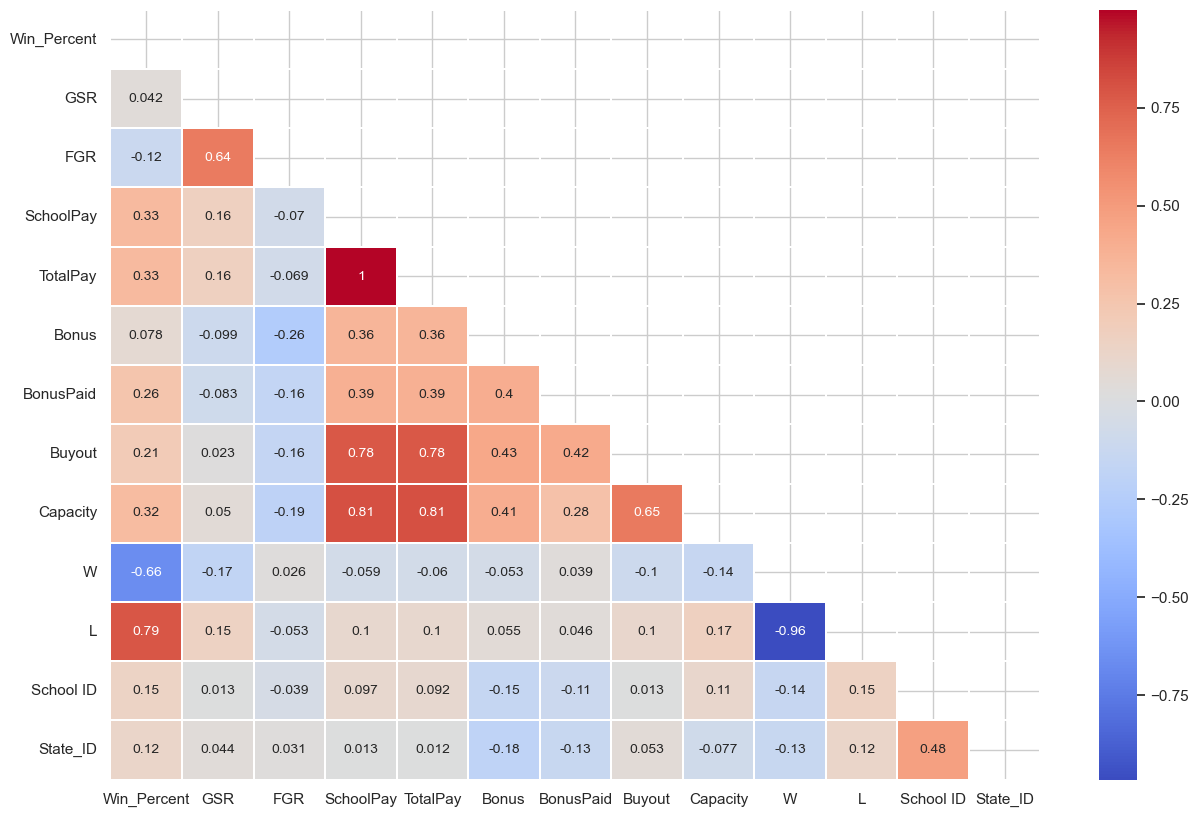

In [774]:
#heatmap
corrmat = mdf1.corr() 
  
f, ax = plt.subplots(figsize =(15, 10)) 
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corrmat, mask=mask, ax=ax, cmap="coolwarm", annot=True, annot_kws={"size": 10}, linewidths=0.1)


C:\Users\ksmen\AppData\Local\Temp\ipykernel_18204\3919720168.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  bp.set_yticklabels(['${:,.0f}'.format(x) for x in bp.get_yticks()])


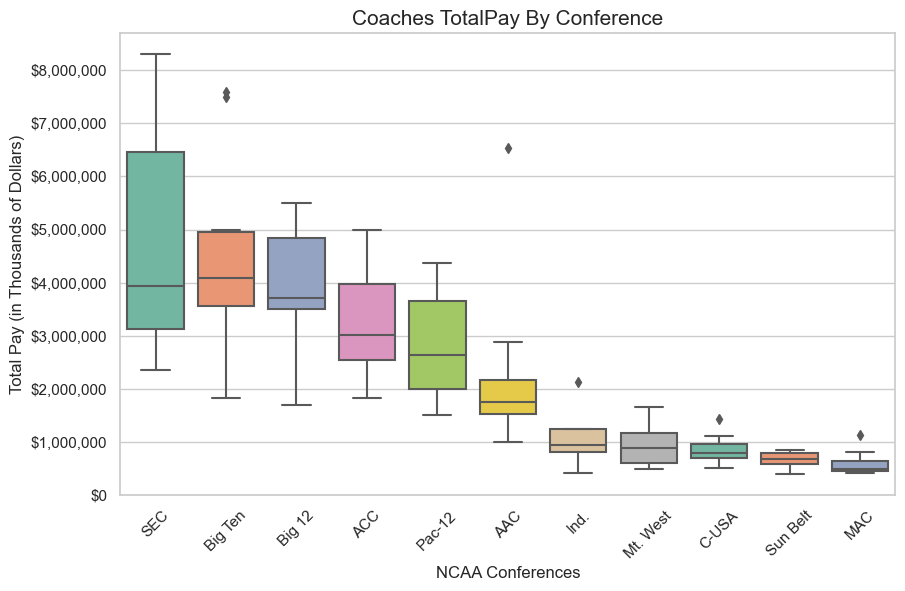

In [775]:
#Boxplot By Conference
plt.figure(figsize=(10,6)) # adjust figure size
order = mdf.groupby('Conference')['TotalPay'].mean().sort_values(ascending=False).index # order by mean TotalPay in descending order
palette = 'Set2' # set color palette
bp = sns.boxplot(x="Conference",
                 y="TotalPay",
                 data=mdf,
                 order=order,
                 palette=palette)

#add title, xlabel and y label
plt.title('Coaches TotalPay By Conference', fontsize=15)
plt.xlabel('NCAA Conferences')
plt.ylabel('Total Pay (in Thousands of Dollars)')
#Get full number on y axis
bp.set_yticklabels(['${:,.0f}'.format(x) for x in bp.get_yticks()])
#rotate names 
bp.set_xticklabels(bp.get_xticklabels(), rotation=45)
plt.show()


C:\Users\ksmen\AppData\Local\Temp\ipykernel_18204\3756173982.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  bp.set_yticklabels(['${:,.0f}'.format(x) for x in bp.get_yticks()])


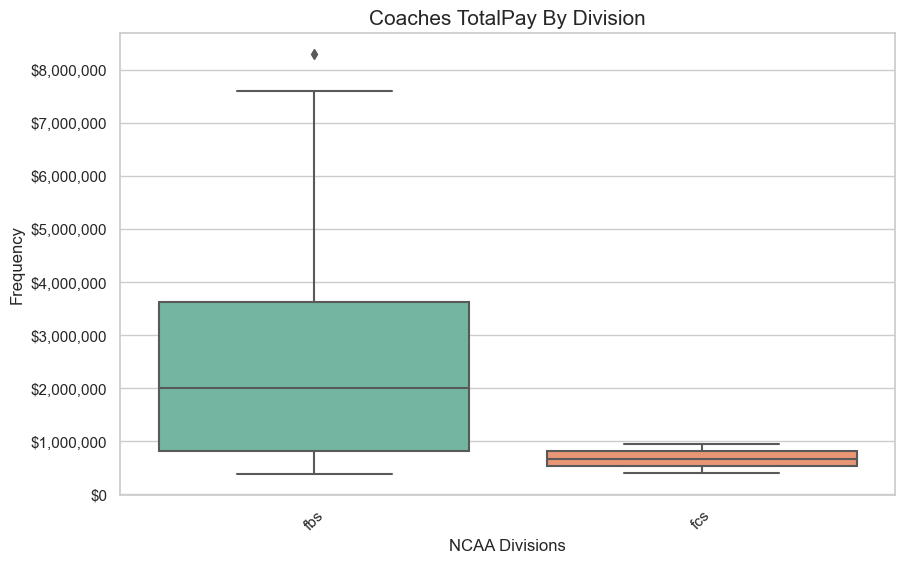

In [776]:
# Histogram By Division
plt.figure(figsize=(10,6)) # adjust figure size
order = mdf.groupby('Div')['TotalPay'].mean().sort_values(ascending=False).index # order by mean TotalPay in descending order
palette = 'Set2' # set color palette
bp = sns.boxplot(x="Div", y="TotalPay",data=mdf, order=order,palette=palette)

#add title, xlabel and y label
plt.title('Coaches TotalPay By Division', fontsize=15)
plt.xlabel('NCAA Divisions')
plt.ylabel('Frequency')
#rotate names 
bp.set_xticklabels(bp.get_xticklabels(), rotation=45)
bp.set_yticklabels(['${:,.0f}'.format(x) for x in bp.get_yticks()])

plt.show()


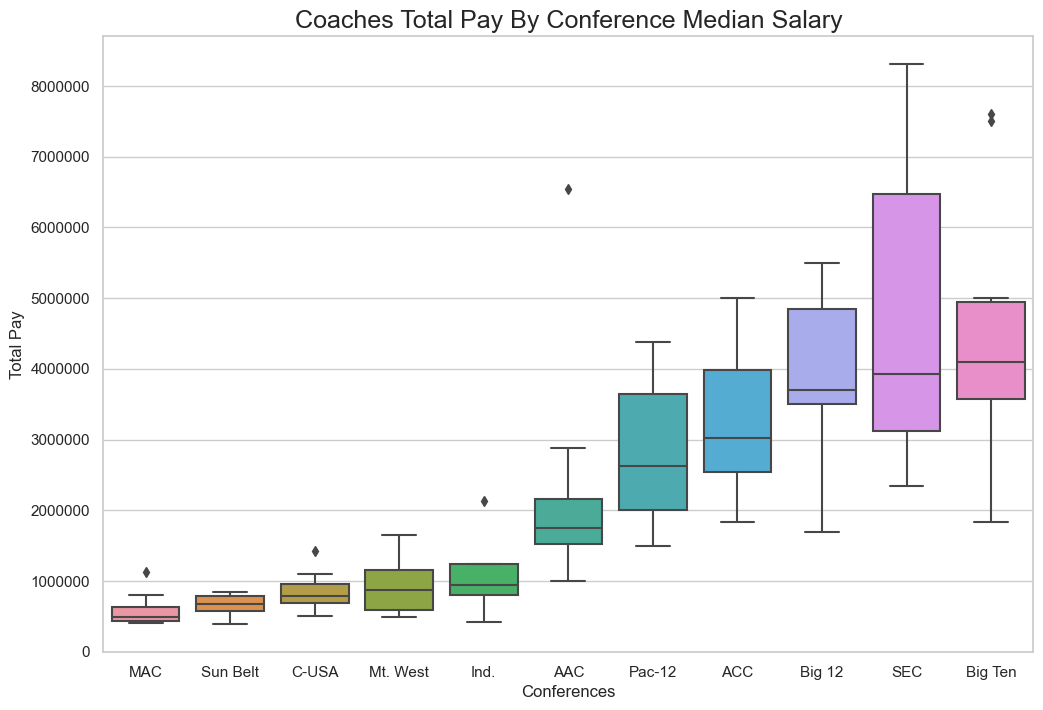

In [812]:
plt.figure(figsize=(12,8))

# Sort the data by median TotalPay for each conference
medians = mdf.groupby('Conference')['TotalPay'].median().sort_values()

# Create a boxplot with sorted order
sns.boxplot(data=mdf, x='Conference', y='TotalPay', order=medians.index)

plt.title('Coaches Total Pay By Conference Median Salary', fontsize=18)
plt.xlabel('Conferences')
plt.ylabel('Total Pay')
# Format y-axis ticks as full numbers
plt.ticklabel_format(style='plain', axis='y')

plt.show()

In [777]:
columns_list = mdf.columns.tolist()

print(columns_list)

['School', 'Win_Percent', 'MOV', 'ATS +/-', 'GSR', 'FGR', 'Coach', 'SchoolPay', 'TotalPay', 'Bonus', 'BonusPaid', 'Buyout', 'Stadium', 'City', 'State', 'Conference', 'Capacity', 'Built', 'Div', 'Latitude', 'Longitude', 'W', 'L', 'School ID', 'State_ID']


In [779]:
# Teams List
BigE = ['Cincinnati', 'Connecticut', 'Pittsburgh', 'Rutgers', 'South Florida','Syracuse','Louisville']
Big10 = ['Syracuse','Illinois', 'Minnesota','Northwestern','Purdue', 'Wisconsin','Michigan','Indiana','Iowa','Ohio State','Michigan State','Penn State', 'Nebraska','Maryland','Rutgers']
Syr = 'ACC'

In [780]:
#Create data frames for big 10, big east and current acc conferences
mdf2=mdf[mdf.School.isin(BigE)]
mdf3=mdf[mdf.School.isin(Big10)]
mdf4=mdf[mdf.Conference=='ACC']

mdf4

,School,Win_Percent,MOV,ATS +/-,GSR,FGR,Coach,SchoolPay,TotalPay,Bonus,...,Conference,Capacity,Built,Div,Latitude,Longitude,W,L,School ID,State_ID
13,Boston College,25.0,-12.6,-5.2,97,82.0,Steve Addazio,2514859.0,2514859.0,0.0,...,ACC,44500,1957,fbs,42.335108,-71.166472,9,3,14,17
27,Duke,69.2,10.8,8.7,95,90.0,David Cutcliffe,2540928.0,2540928.0,0.0,...,ACC,33941,1929,fbs,35.995317,-78.941724,4,9,28,23
33,Florida State,76.9,15.5,4.7,63,44.0,Willie Taggart,5000000.0,5000000.0,1475000.0,...,ACC,82300,1950,fbs,30.437548,-84.304534,3,10,34,7
36,Georgia Tech,41.7,-11.3,0.7,88,67.0,Paul Johnson,3060018.0,3060018.0,1330000.0,...,ACC,55000,1913,fbs,33.772557,-84.392853,7,5,39,8
53,Louisville,61.5,7.8,5.8,94,78.0,Bobby Petrino,3980434.0,3980434.0,1472917.0,...,ACC,55000,1998,fbs,38.205422,-85.758106,5,8,55,15
58,Miami,41.7,-3.2,-10.7,83,52.0,Mark Richt,4058061.0,4058061.0,0.0,...,ACC,65326,1987,fbs,25.957934,-80.238841,7,5,59,7
67,North Carolina,64.3,3.6,-1.9,71,59.0,Larry Fedora,2575000.0,2575000.0,900000.0,...,ACC,62980,1927,fbs,35.906988,-79.047918,5,9,74,23
71,North Carolina State,61.5,5.2,-4.1,79,52.0,Dave Doeren,3000000.0,3000000.0,1350000.0,...,ACC,57583,1966,fbs,35.800760,-78.719487,5,8,75,23
86,Pittsburgh,69.2,7.0,0.3,94,65.0,Pat Narduzzi,3017718.0,3017718.0,0.0,...,ACC,68400,2001,fbs,40.446784,-80.015756,4,9,88,32
98,Syracuse,53.9,4.6,0.6,82,69.0,Dino Babers,2401206.0,2401206.0,0.0,...,ACC,49250,1980,fbs,43.036133,-76.136520,6,7,101,28


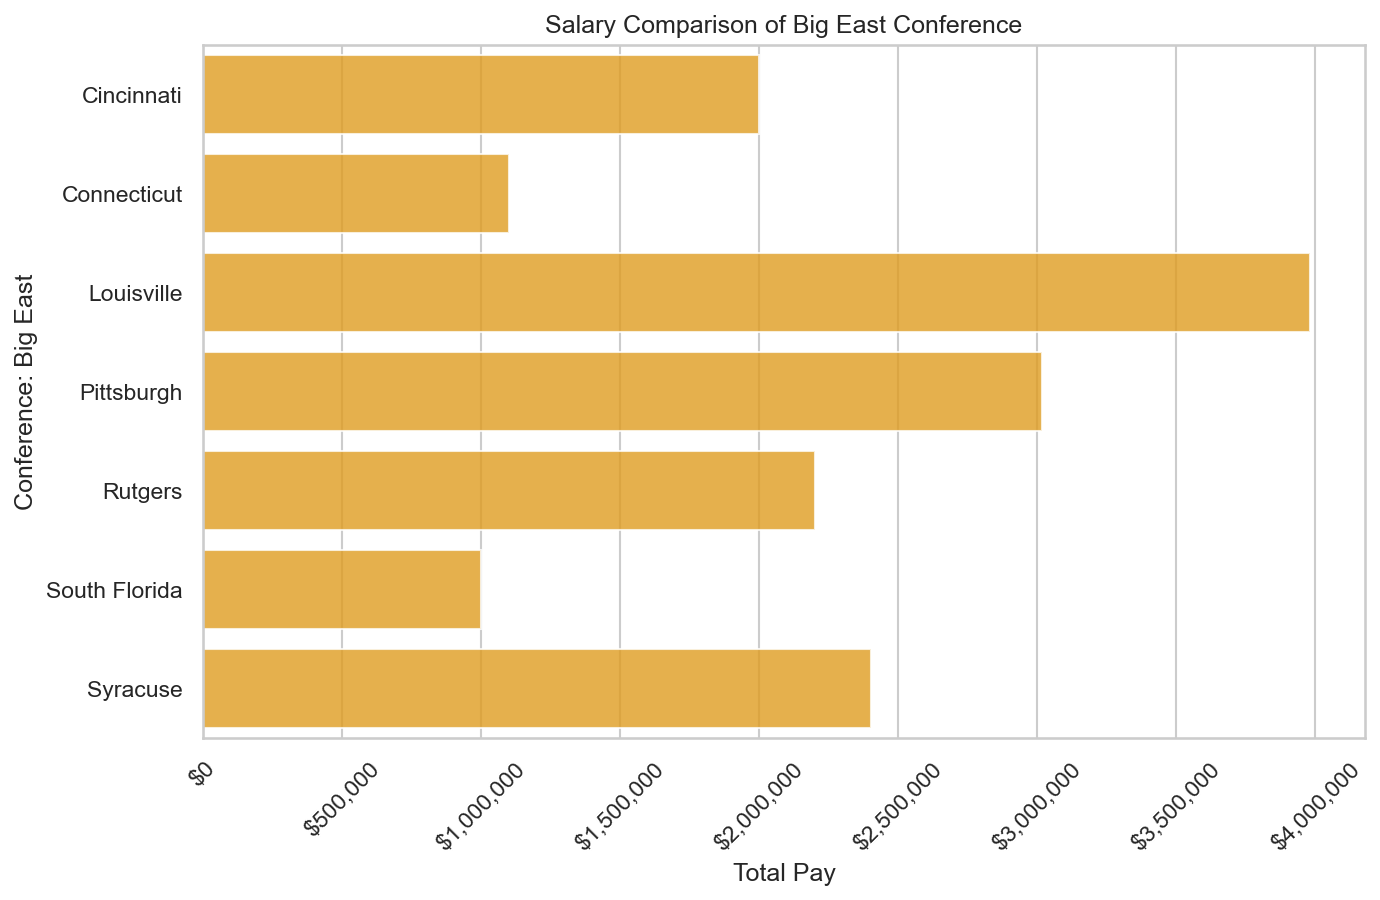

In [781]:
# Big Ten Schools Total Pay comparisons
# Look at salary by conferences and schools
# conferences x-axis - y-axis salary
plt.figure(figsize=(10,6), dpi=150)

sns.barplot(x='TotalPay', y='School', data=mdf2, color='orange', alpha=0.8)

plt.xlabel('Total Pay')
plt.ylabel('Conference: Big East')
plt.title('Salary Comparison of Big East Conference')

plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter('${x:,.0f}')

plt.show()

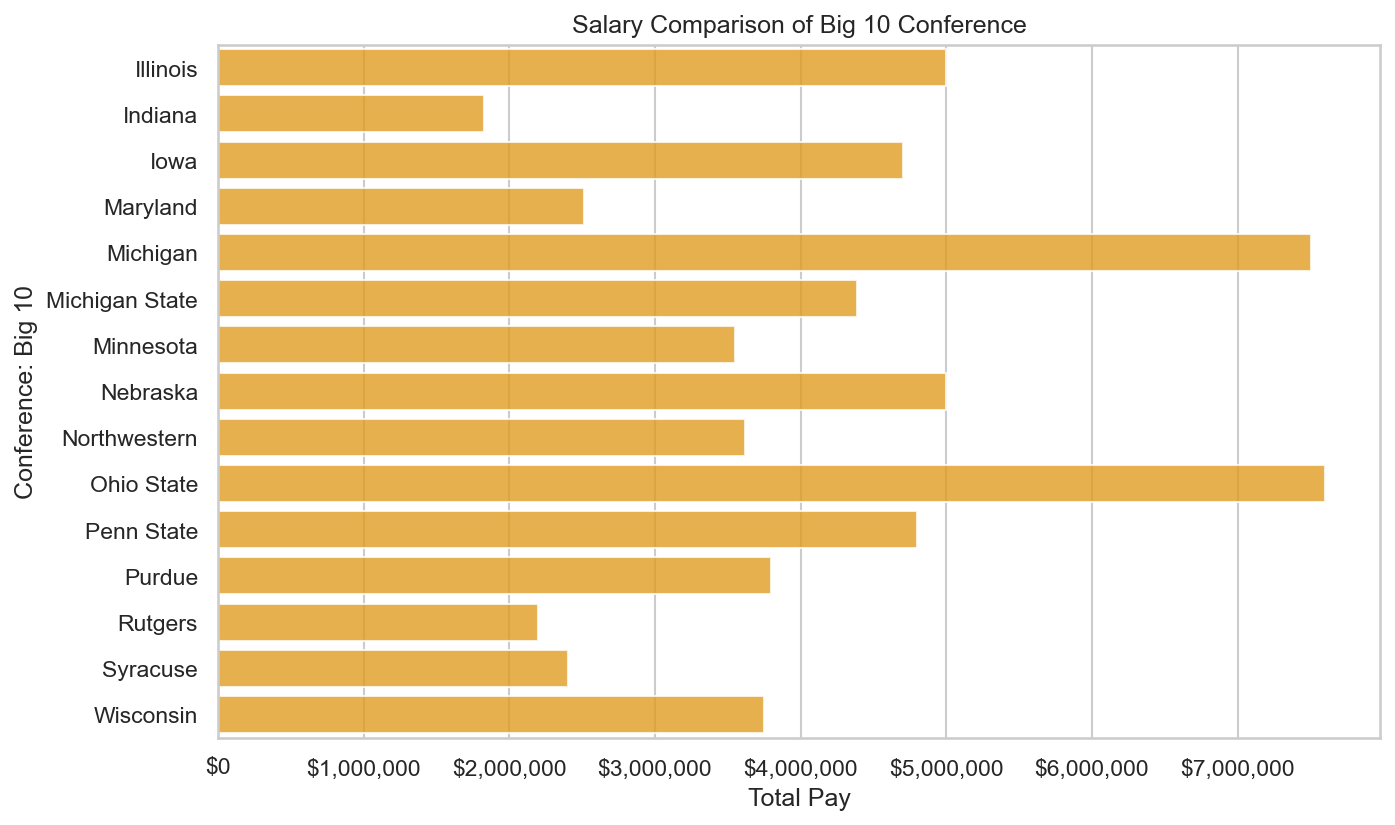

In [782]:
# Big Ten Schools Total Pay comparisons
# Look at salary by conferences and schools
# conferences x-axis - y-axis salary

plt.figure(figsize=(10,6), dpi=150)

sns.barplot(x='TotalPay', y='School', data=mdf3, color='orange', alpha=0.8)

plt.xlabel('Total Pay')
plt.ylabel('Conference: Big 10')
plt.title('Salary Comparison of Big 10 Conference')

plt.gca().xaxis.set_major_formatter('${x:,.0f}')

plt.show()

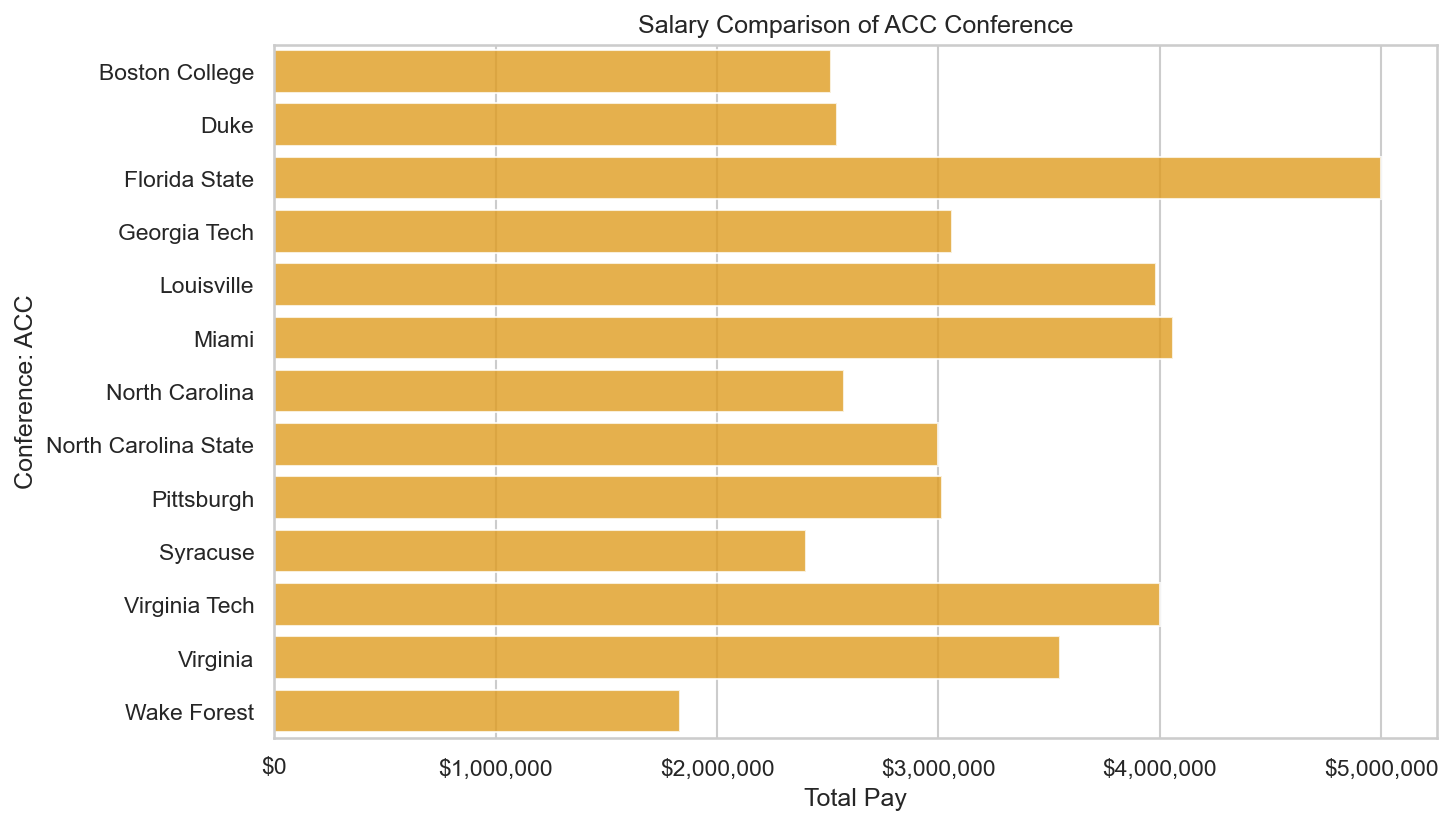

In [783]:
# Big Ten Schools Total Pay comparisons
# Look at salary by conferences and schools
# conferences x-axis - y-axis salary
plt.figure(figsize=(10,6), dpi=150)

sns.barplot(x='TotalPay', y='School', data=mdf4, color='orange', alpha=0.8)

plt.xlabel('Total Pay')
plt.ylabel('Conference: ACC')
plt.title('Salary Comparison of ACC Conference')

plt.gca().xaxis.set_major_formatter('${x:,.0f}')

plt.show()


Text(0.5, 0.98, 'TotalPay vs. Capacity, GSR,FGR, Win_Percent')

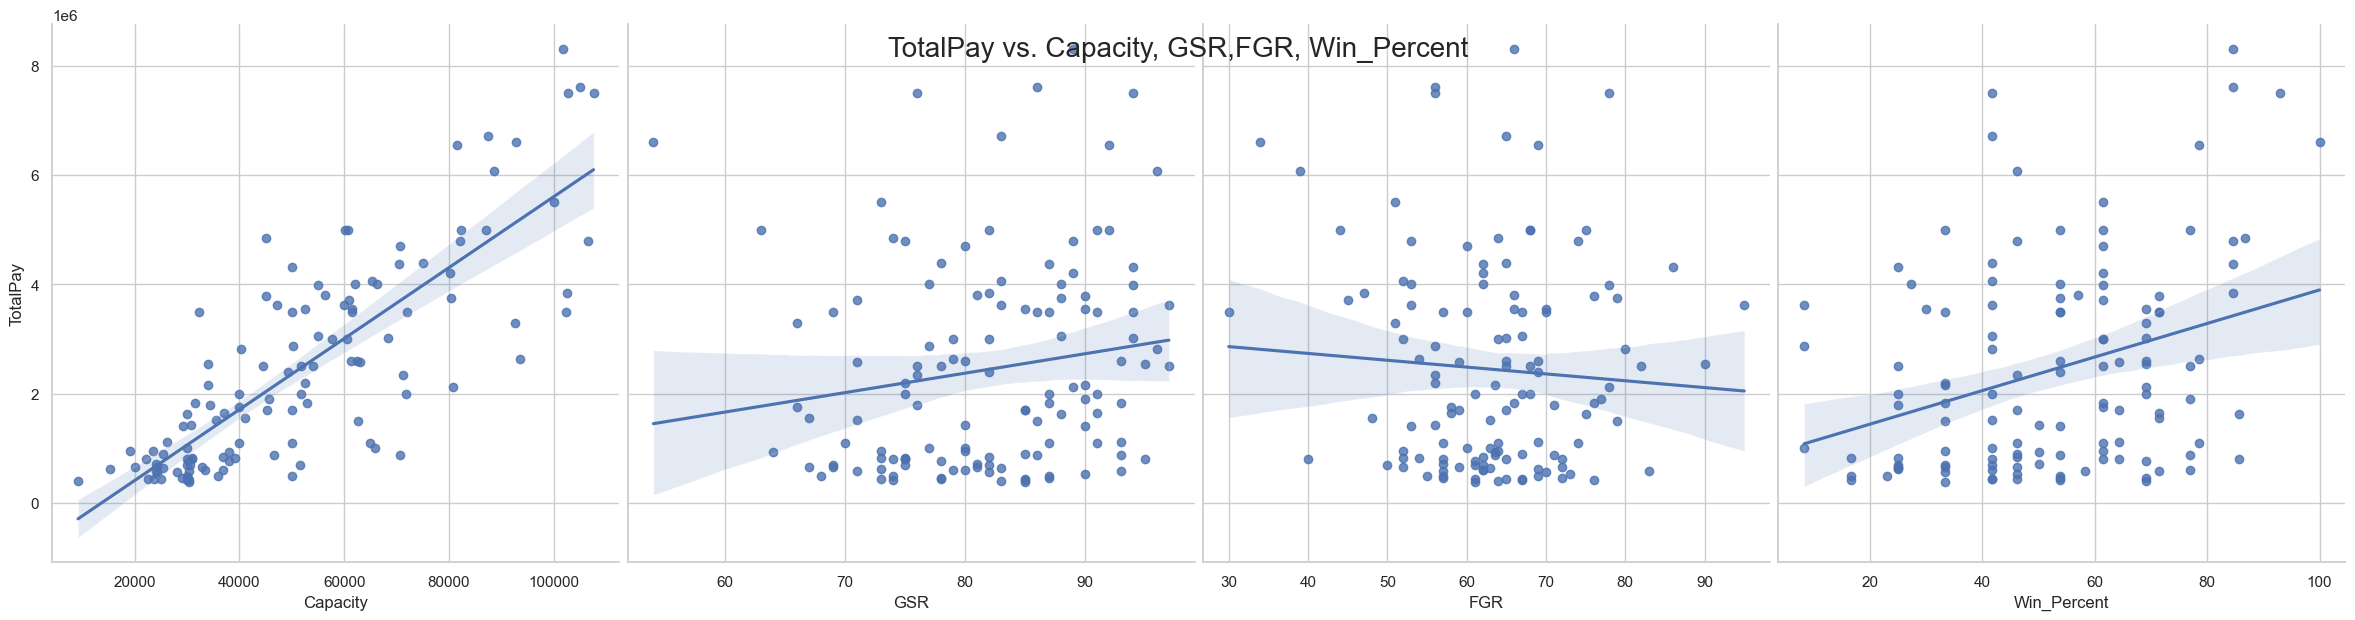

In [814]:
# Multilple Scatter Plot create a Scatterplot 'Capacity','GSR','FGR','Win_Percent' columns compared to the TotalPay column
g=sns.pairplot(mdf, x_vars=['Capacity','GSR','FGR','Win_Percent'], y_vars='TotalPay', height=6, aspect=1, kind='reg')
plt.subplots_adjust(top=1)
g.fig.suptitle('TotalPay vs. Capacity, GSR,FGR, Win_Percent',fontsize = 20)

In [785]:
['School', 'Win_Percent', 'MOV', 'ATS +/-', 'GSR', 'FGR', 'Coach', 'SchoolPay', 'TotalPay', 
 'Bonus', 'BonusPaid', 'Buyout', 'Stadium', 'City', 
 'State', 'Conference', 'Capacity', 'Built', 'Div', 'Latitude', 'Longitude', 'W', 'L', 'School ID']

['School',
 'Win_Percent',
 'MOV',
 'ATS +/-',
 'GSR',
 'FGR',
 'Coach',
 'SchoolPay',
 'TotalPay',
 'Bonus',
 'BonusPaid',
 'Buyout',
 'Stadium',
 'City',
 'State',
 'Conference',
 'Capacity',
 'Built',
 'Div',
 'Latitude',
 'Longitude',
 'W',
 'L',
 'School ID']

## Modeling

In [786]:
tdf=mdf.copy()

In [787]:
np.random.seed(1234)
# Split data
np.random.seed(1234)
tdf['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(tdf))
train = tdf[tdf['runiform'] >= 0.33]
test = tdf[tdf['runiform'] < 0.33]

# check training data frame
print('rows, columns: ',train.shape)

# check test data frame
print('rows, columns: ',test.shape)
#Specifiy the models that we will use for our Regression models
#Single Regression
m1 = str('TotalPay ~ Win_Percent') 
m2= str('TotalPay ~ Capacity') 
#Multiple Regression
#The variables that had the highest correlaation to the Total pay Dependent variable 
m3 = str('TotalPay ~ Capacity +  Win_Percent + Buyout +Bonus+ BonusPaid ') 
m4 = str('TotalPay ~ Win_Percent + Capacity + GSR+FGR') 
m5 = str('TotalPay ~ Win_Percent + Capacity+Buyout +GSR')
m6 = str('TotalPay ~ Win_Percent + Capacity+ Buyout+FGR')
m7 = str('TotalPay ~ State_ID + Capacity + Win_Percent + MOV+GSR+Buyout+BonusPaid ')


rows, columns:  (89, 26)
rows, columns:  (34, 26)


In [788]:
# M1: fit the model to the training set
train_m1_fit = smf.ols(m1,data=train).fit()
print(train_m1_fit.summary())
# training set predictions 
train['NewTotalPay'] = train_m1_fit.fittedvalues
test['NewTotalPay'] = train_m1_fit.predict(test)
#compute the proportion of response variance  
vt1 = round(np.power(test['TotalPay'].corr(test['NewTotalPay']),2),3)
print("M1: Proportion of Test Set Variance Accounted for: {0}".format(vt1))

                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     15.35
Date:                Mon, 24 Apr 2023   Prob (F-statistic):           0.000177
Time:                        18:43:31   Log-Likelihood:                -1410.3
No. Observations:                  89   AIC:                             2825.
Df Residuals:                      87   BIC:                             2830.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.413e+05   5.56e+05      0.973      

C:\Users\ksmen\AppData\Local\Temp\ipykernel_18204\3283069949.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['NewTotalPay'] = train_m1_fit.fittedvalues
C:\Users\ksmen\AppData\Local\Temp\ipykernel_18204\3283069949.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['NewTotalPay'] = train_m1_fit.predict(test)


In [789]:
# m2: fit the model to the training set
train_m2_fit = smf.ols(m2,data=train).fit()
print(train_m2_fit.summary())
# training set predictions 
train['NewTotalPay1'] = train_m2_fit.fittedvalues
test['NewTotalPay1'] = train_m2_fit.predict(test)
#compute the proportion of response variance  
vt2 = round(np.power(test['TotalPay'].corr(test['NewTotalPay1']),2),3)
print("m2: Proportion of Test Set Variance Accounted for: {0}".format(vt2))

                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     182.9
Date:                Mon, 24 Apr 2023   Prob (F-statistic):           4.19e-23
Time:                        18:43:31   Log-Likelihood:                -1367.2
No. Observations:                  89   AIC:                             2738.
Df Residuals:                      87   BIC:                             2743.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -8.49e+05   2.81e+05     -3.019      0.0

C:\Users\ksmen\AppData\Local\Temp\ipykernel_18204\4153622624.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['NewTotalPay1'] = train_m2_fit.fittedvalues
C:\Users\ksmen\AppData\Local\Temp\ipykernel_18204\4153622624.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['NewTotalPay1'] = train_m2_fit.predict(test)


In [790]:
# m3: fit the model to the training set
train_m3_fit = smf.ols(m3,data=train).fit()
print(train_m3_fit.summary())
# training set predictions 
train['NewTotalPay2'] = train_m3_fit.fittedvalues
test['NewTotalPay2'] = train_m3_fit.predict(test)
#compute the proportion of response variance  
vt3 = round(np.power(test['TotalPay'].corr(test['NewTotalPay2']),2),3)
print("m3: Proportion of Test Set Variance Accounted for: {0}".format(vt3))
print("\nM3: Most significant attribute: '{0}' with value: {1}".format(train_m3_fit.params[1:].idxmax(),round(train_m3_fit.params[1:].max()),0))


                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     67.57
Date:                Mon, 24 Apr 2023   Prob (F-statistic):           8.40e-28
Time:                        18:43:31   Log-Likelihood:                -1345.3
No. Observations:                  89   AIC:                             2703.
Df Residuals:                      83   BIC:                             2718.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.312e+05   3.22e+05     -1.651      

C:\Users\ksmen\AppData\Local\Temp\ipykernel_18204\2676997465.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['NewTotalPay2'] = train_m3_fit.fittedvalues
C:\Users\ksmen\AppData\Local\Temp\ipykernel_18204\2676997465.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['NewTotalPay2'] = train_m3_fit.predict(test)


In [791]:
# m4: fit the model to the training set
train_m4_fit = smf.ols(m4,data=train).fit()
print(train_m4_fit.summary())
# training set predictions 
train['NewTotalPay3'] = train_m4_fit.fittedvalues
test['NewTotalPay3'] = train_m4_fit.predict(test)
#compute the proportion of response variance  
vt4 = round(np.power(test['TotalPay'].corr(test['NewTotalPay3']),2),3)
print("m4: Proportion of Test Set Variance Accounted for: {0}".format(vt4))
print("\nM4: Most significant attribute: '{0}' with value: {1}".format(train_m4_fit.params[1:].idxmax(),round(train_m4_fit.params[1:].max()),0))


                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     50.20
Date:                Mon, 24 Apr 2023   Prob (F-statistic):           1.64e-21
Time:                        18:43:31   Log-Likelihood:                -1363.2
No. Observations:                  89   AIC:                             2736.
Df Residuals:                      84   BIC:                             2749.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.549e+06   1.11e+06     -3.210      

C:\Users\ksmen\AppData\Local\Temp\ipykernel_18204\1335126751.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['NewTotalPay3'] = train_m4_fit.fittedvalues
C:\Users\ksmen\AppData\Local\Temp\ipykernel_18204\1335126751.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['NewTotalPay3'] = train_m4_fit.predict(test)


In [792]:
# m5: fit the model to the training set
train_m5_fit = smf.ols(m5,data=train).fit()
print(train_m5_fit.summary())
# training set predictions 
train['NewTotalPay4'] = train_m5_fit.fittedvalues
test['NewTotalPay4'] = train_m5_fit.predict(test)
#compute the proportion of response variance  
vt5 = round(np.power(test['TotalPay'].corr(test['NewTotalPay4']),2),3)
print("m5: Proportion of Test Set Variance Accounted for: {0}".format(vt5))
# look at each parameter in the motel
print("\nM5: Most significant attribute: '{0}' with value: {1}".format(train_m5_fit.params[1:].idxmax(),round(train_m5_fit.params[1:].max()),0))

C:\Users\ksmen\AppData\Local\Temp\ipykernel_18204\4180896626.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['NewTotalPay4'] = train_m5_fit.fittedvalues


                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     90.01
Date:                Mon, 24 Apr 2023   Prob (F-statistic):           1.49e-29
Time:                        18:43:31   Log-Likelihood:                -1343.4
No. Observations:                  89   AIC:                             2697.
Df Residuals:                      84   BIC:                             2709.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.928e+06   8.87e+05     -3.300      

C:\Users\ksmen\AppData\Local\Temp\ipykernel_18204\4180896626.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['NewTotalPay4'] = train_m5_fit.predict(test)


In [793]:
# m6: fit the model to the training set
train_m6_fit = smf.ols(m6,data=train).fit()
print(train_m6_fit.summary())
# training set predictions 
train['NewTotalPay5'] = train_m6_fit.fittedvalues
test['NewTotalPay5'] = train_m6_fit.predict(test)
#compute the proportion of response variance  
vt6 = round(np.power(test['TotalPay'].corr(test['NewTotalPay5']),2),3)
print("m6: Proportion of Test Set Variance Accounted for: {0}".format(vt6))
# look at each parameter in the motel
print("\nm6: Most significant attribute: '{0}' with value: {1}".format(train_m6_fit.params[1:].idxmax(),round(train_m6_fit.params[1:].max()),0))


                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     85.82
Date:                Mon, 24 Apr 2023   Prob (F-statistic):           7.42e-29
Time:                        18:43:32   Log-Likelihood:                -1345.2
No. Observations:                  89   AIC:                             2700.
Df Residuals:                      84   BIC:                             2713.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.888e+06   6.91e+05     -2.733      

C:\Users\ksmen\AppData\Local\Temp\ipykernel_18204\1780587519.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['NewTotalPay5'] = train_m6_fit.fittedvalues
C:\Users\ksmen\AppData\Local\Temp\ipykernel_18204\1780587519.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['NewTotalPay5'] = train_m6_fit.predict(test)


In [794]:
# m7: fit the model to the training set
train_m7_fit = smf.ols(m7,data=train).fit()
print(train_m7_fit.summary())
# training set predictions 
train['NewTotalPay6'] = train_m7_fit.fittedvalues
test['NewTotalPay6'] = train_m7_fit.predict(test)
#compute the proportion of response variance  
vt7 = round(np.power(test['TotalPay'].corr(test['NewTotalPay6']),2),3)
print("m7: Proportion of Test Set Variance Accounted for: {0}".format(vt7))
# look at each parameter in the motel
print("\nM7: Most significant attribute: '{0}' with value: {1}".format(train_m7_fit.params[1:].idxmax(),round(train_m7_fit.params[1:].max()),0))


                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     50.69
Date:                Mon, 24 Apr 2023   Prob (F-statistic):           5.33e-27
Time:                        18:43:32   Log-Likelihood:                -1342.7
No. Observations:                  89   AIC:                             2701.
Df Residuals:                      81   BIC:                             2721.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.141e+06   1.09e+06     -2.895      

C:\Users\ksmen\AppData\Local\Temp\ipykernel_18204\3569961414.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['NewTotalPay6'] = train_m7_fit.fittedvalues
C:\Users\ksmen\AppData\Local\Temp\ipykernel_18204\3569961414.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['NewTotalPay6'] = train_m7_fit.predict(test)


In [795]:
# Create Seperate column for each conference
tdf = tdf.assign(MtWest = tdf['Conference'])
tdf['Mt_West'] = tdf['Conference'].apply(lambda x: 1 if x == 'Mt. West' else 0)
tdf['MAC'] = tdf['Conference'].apply(lambda x: 1 if x == 'MAC' else 0)
tdf['SEC'] = tdf['Conference'].apply(lambda x: 1 if x == 'SEC' else 0)
tdf['C_USA'] = tdf['Conference'].apply(lambda x: 1 if x == 'C-USA' else 0)
tdf['Sun_Belt'] = tdf['Conference'].apply(lambda x: 1 if x == 'Sun Belt' else 0)
tdf['Pac_12'] = tdf['Conference'].apply(lambda x: 1 if x == 'Pac-12' else 0)
tdf['Ind'] = tdf['Conference'].apply(lambda x: 1 if x == 'Ind.' else 0)
tdf['ACC'] = tdf['Conference'].apply(lambda x: 1 if x == 'ACC' else 0)
tdf['AAC'] = tdf['Conference'].apply(lambda x: 1 if x == 'AAC' else 0)
tdf['Big_10'] = tdf['Conference'].apply(lambda x: 1 if x == 'Big Ten' else 0)
tdf['Big_12'] = tdf['Conference'].apply(lambda x: 1 if x == 'Big 12' else 0)

In [796]:
# employ training-and-test regimen for model validation
np.random.seed(1234)
tdf['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(tdf))
tdf_train = tdf[tdf['runiform'] >= 0.33]
tdf_test = tdf[tdf['runiform'] < 0.33]
print(tdf_train.head())
print(tdf_test.head())

              School  Win_Percent   MOV  ATS +/-  GSR   FGR  \
1              Akron         16.7 -11.8      2.7   74  76.0   
2            Alabama         84.6  22.9     -1.9   89  66.0   
3  Appalachian State         50.0   8.2     -4.5   81  57.0   
4            Arizona         41.7  -5.7      1.5   75  61.0   
7     Arkansas State         25.0  -6.4     -1.0   75  52.0   

               Coach  SchoolPay   TotalPay      Bonus  ...  MAC  SEC C_USA  \
1       Terry Bowden   411000.0   412500.0   225000.0  ...    1    0     0   
2         Nick Saban  8307000.0  8307000.0  1100000.0  ...    0    1     0   
3  Scott Satterfield   712500.0   712500.0   295000.0  ...    0    0     0   
4       Kevin Sumlin  1600000.0  2000000.0  2025000.0  ...    0    0     0   
7     Blake Anderson   825000.0   825000.0   185000.0  ...    0    0     0   

  Sun_Belt Pac_12 Ind  ACC  AAC Big_10  Big_12  
1        0      0   0    0    0      0       0  
2        0      0   0    0    0      0       0  
3    

In [797]:
# specify a simple model with Team Conference
cm = str('TotalPay ~ SEC + C_USA + Sun_Belt + Pac_12 + Ind + ACC + AAC + Big_10 + Big_12 + Mt_West + MAC + Capacity + Win_Percent + GSR + FGR + Buyout +Bonus+ BonusPaid' )

# fit the model to the training set
train_cm_fit = smf.ols(cm, data = tdf_train).fit()

# summary of model fit to the training set
print(train_cm_fit.summary())
tdf_train['NewTotalPay'] = train_cm_fit.fittedvalues
tdf_test['NewTotalPay'] = train_cm_fit.predict(tdf_test)
vtcm = round(np.power(tdf_test['TotalPay'].corr(tdf_test['NewTotalPay']),2),3)
print("cm: Proportion of Test Set Variance Accounted for: {0}".format(vtcm))
print("\nCM: Most significant attribute: '{0}' with value: {1}".format(train_cm_fit.params[1:].idxmax(), round(train_cm_fit.params[1:].max()),0))


                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     39.27
Date:                Mon, 24 Apr 2023   Prob (F-statistic):           2.60e-29
Time:                        18:43:32   Log-Likelihood:                -1313.3
No. Observations:                  89   AIC:                             2663.
Df Residuals:                      71   BIC:                             2707.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.177e+05   7.64e+05     -0.678      

C:\Users\ksmen\AppData\Local\Temp\ipykernel_18204\2595548310.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf_train['NewTotalPay'] = train_cm_fit.fittedvalues


cm: Proportion of Test Set Variance Accounted for: 0.794

CM: Most significant attribute: 'Big_12' with value: 1466578


C:\Users\ksmen\AppData\Local\Temp\ipykernel_18204\2595548310.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf_test['NewTotalPay'] = train_cm_fit.predict(tdf_test)


In [798]:
#linearRegression 
lr = LinearRegression()

# train
y_train = tdf_train[['TotalPay']]
X_train = tdf_train[['Capacity', 'Win_Percent', 'SEC', 'C_USA', 'Sun_Belt', 'Pac_12', 'Ind', 'ACC',
                              'AAC', 'Big_10', 'Big_12', 'Mt_West', 'MAC',  'GSR' , 'FGR' , 'Buyout' , 'Bonus', 'BonusPaid']]
lr.fit(X_train, y_train)
                             

#Predict
y_test = tdf_test[['TotalPay']]
X_test = tdf_test[['Capacity', 'Win_Percent', 'SEC', 'C_USA', 'Sun_Belt', 'Pac_12', 'Ind', 'ACC',
                              'AAC', 'Big_10', 'Big_12', 'Mt_West', 'MAC',  'GSR' , 'FGR' , 'Buyout' , 'Bonus', 'BonusPaid']]
y_pred = lr.predict(X_test)

In [799]:
sy = tdf[tdf['School'] == 'Syracuse']
lr.predict(sy[['Capacity', 'Win_Percent', 'SEC', 'C_USA', 'Sun_Belt', 'Pac_12', 'Ind', 'ACC',
                              'AAC', 'Big_10', 'Big_12', 'Mt_West', 'MAC',  'GSR' , 'FGR' , 'Buyout' , 'Bonus', 'BonusPaid']])

spred = lr.predict(sy[['Capacity', 'Win_Percent', 'SEC', 'C_USA', 'Sun_Belt', 'Pac_12', 'Ind', 'ACC',
                              'AAC', 'Big_10', 'Big_12', 'Mt_West', 'MAC',  'GSR' , 'FGR' , 'Buyout' , 'Bonus', 'BonusPaid']])


# print amount
print("Syracuse Coach Pay should be ",( spred ))
print('${:,.2f}'.format(2705965.00909561))

Syracuse Coach Pay should be  [[2705965.00909561]]
$2,705,965.01


In [800]:
print(train_cm_fit.params[6]) #Coefficiant for ACC
acc = train_cm_fit.params[6]
print("Syracuse Coach Big East Pay should be ",(spred-acc))
print('${:,.2f}'.format(2077458.38741326))

628506.6216823498
Syracuse Coach Big East Pay should be  [[2077458.38741326]]
$2,077,458.39


In [801]:
# Predict Big10 Pay
print(train_cm_fit.params[8]) #Coefficiant for Big10
bigten = train_cm_fit.params[8]
print("Syracuse Coach Big Ten Pay should be ",((spred -acc) + bigten ))
print('${:,.2f}'.format(2959692.17611473))

882233.7887014751
Syracuse Coach Big Ten Pay should be  [[2959692.17611473]]
$2,959,692.18
